In [ ]:
pip install tensorflow 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb 
from tensorflow import keras 


In [ ]:
df = pd.read_csv('Churn_Modelling.csv')


In [ ]:
df.head(
)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.drop(['RowNumber','Surname'], axis = 'columns', inplace =True)

In [ ]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.isna().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.dtypes

CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
col_obj = ['Geography', 'Gender']

In [ ]:
for col in df:
    if (col in col_obj):
        print(col,":",df[col].unique())

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [ ]:
df['Gender'].replace(['Male', 'Female'],[1, 0], inplace= True)

In [ ]:
df= pd.get_dummies(data = df, columns=['Geography'])
df.columns

Index(['CustomerId', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [ ]:
df.dtypes

CustomerId             int64
CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df_exited = df[df['Exited']==1]['Tenure']
df_not_exited = df[df['Exited']==0]['Tenure']


In [ ]:
 def visualization(x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("No. of customers", fontsize=20)
    plt.legend()

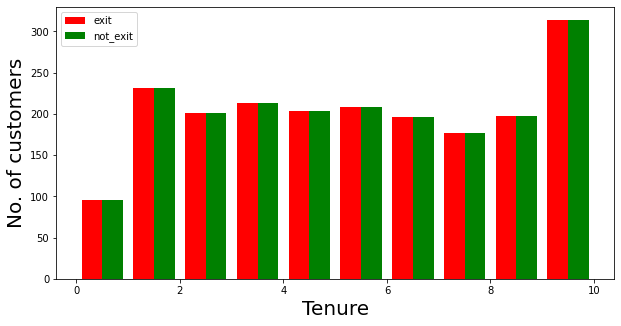

In [ ]:
visualization(df_exited, df_exited, "Tenure")

In [ ]:
df_exited2 = df[df['Exited']==1]['Age']
df_exited2 = df[df['Exited']==0]['Age']

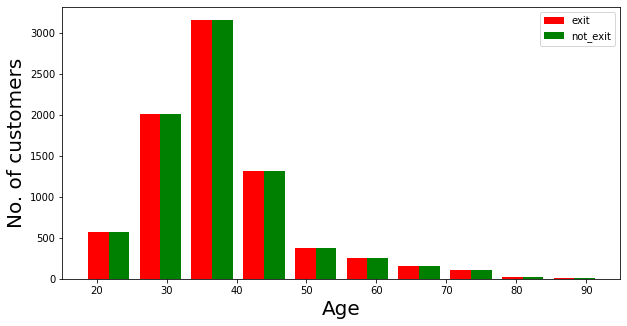

In [ ]:
visualization(df_exited2, df_exited2, "Age")

In [ ]:
df.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
cols_to_scale = ['CustomerId','CreditScore', 'Age','Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [ ]:
df.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.275616,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.326454,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.214421,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.542636,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,0.688778,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [ ]:
x = df.drop('Exited', axis= 'columns')
y = df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state =1)


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,),activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=200)


Epoch 1/200
250/250 [==============================] - 1s 2ms/step - loss: 0.5063 - accuracy: 0.7972
Epoch 2/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.7972
Epoch 3/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.7991
Epoch 4/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4455 - accuracy: 0.8085
Epoch 5/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.8127
Epoch 6/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.8144
Epoch 7/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.8177
Epoch 8/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4252 - accuracy: 0.8177
Epoch 9/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.8201
Epoch 10/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4200 - accura

In [ ]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3377 - accuracy: 0.8650


[0.3377017080783844, 0.8650000095367432]

In [ ]:
yp = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,yp))

ValueError: ignored

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1585
           1       0.77      0.50      0.60       415

    accuracy                           0.86      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.86      0.85      2000



Text(69.0, 0.5, 'Truth')

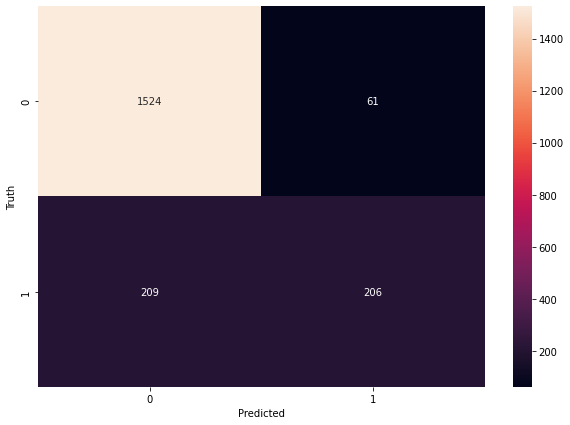

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [54]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [56]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_sm, y_sm = sm.fit_resample(x, y)

In [57]:
y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [59]:
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm,y_sm, test_size= 0.2, random_state =1, stratify = y_sm)

In [60]:
model_balanced = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,),activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_balanced.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_balanced.fit(x_train_sm, y_train_sm, epochs=100)

Epoch 1/100
399/399 [==============================] - 1s 2ms/step - loss: 0.6528 - accuracy: 0.6207
Epoch 2/100
399/399 [==============================] - 1s 2ms/step - loss: 0.6097 - accuracy: 0.6737
Epoch 3/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5826 - accuracy: 0.6918
Epoch 4/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5677 - accuracy: 0.7059
Epoch 5/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5556 - accuracy: 0.7130
Epoch 6/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5473 - accuracy: 0.7217
Epoch 7/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5363 - accuracy: 0.7261
Epoch 8/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5273 - accuracy: 0.7334
Epoch 9/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5153 - accuracy: 0.7437
Epoch 10/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5053 - accura

In [61]:
model_balanced.evaluate(x_test_sm, y_test_sm)

100/100 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8085


[0.4101403057575226, 0.8085373640060425]

In [62]:
yp = model_balanced.predict(x_test_sm)

In [63]:
y_pred = []
for element in yp:
    if (element > 0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)

In [64]:
print(classification_report(y_test_sm,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1593
           1       0.81      0.80      0.81      1593

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186



Text(69.0, 0.5, 'Truth')

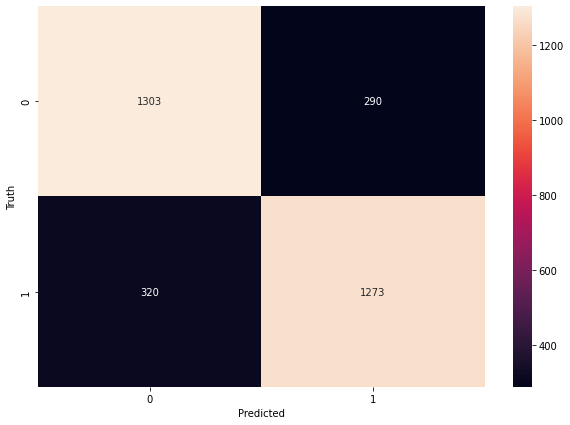

In [65]:
#to calculate the f1 score 
cm_bal = tf.math.confusion_matrix(labels=y_test_sm,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm_bal, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [66]:
print(classification_report(y_test_sm,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1593
           1       0.81      0.80      0.81      1593

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186

